link: https://www.kaggle.com/datasets/PromptCloudHQ/imdb-data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read the file
data = pd.read_csv('IMDB-Movie-Data.csv')

1. Display The Dataset

In [3]:
data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


Check Null Values In The Dataset

In [4]:
data.isnull().any()

Rank                  False
Title                 False
Genre                 False
Description           False
Director              False
Actors                False
Year                  False
Runtime (Minutes)     False
Rating                False
Votes                 False
Revenue (Millions)     True
Metascore              True
dtype: bool

In [5]:
data.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

<Axes: >

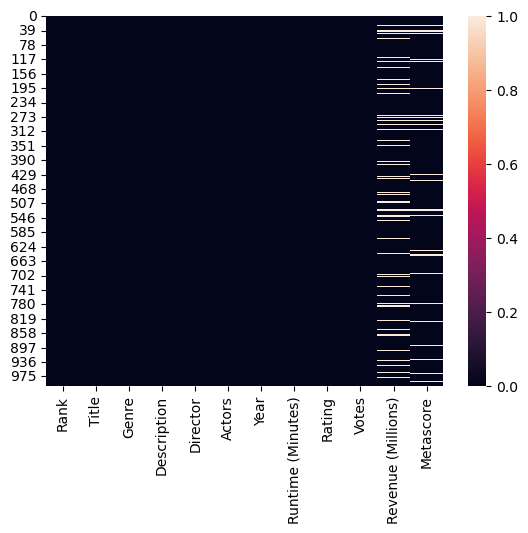

In [6]:
sns.heatmap(data.isnull())

Drop All The Missing Values

In [11]:
data = data.dropna(axis=0)

<Axes: >

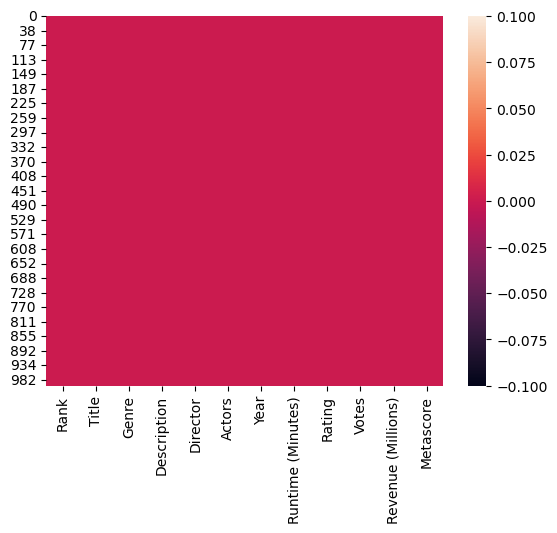

In [12]:
sns.heatmap(data.isnull())

Check For Duplicate Data

In [14]:
dup = data.duplicated().any()

In [15]:
dup

False

Display Title of The Movie Having Runtime >= 180 Minutes

In [16]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [18]:
data[data['Runtime (Minutes)']>=180]['Title']

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
Name: Title, dtype: object

In Which Year There Was The Highest Average Voting?

In [19]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [22]:
data.groupby('Year')['Votes'].mean().sort_values(ascending=False)

Year
2012    290861.483871
2006    277232.219512
2009    267180.577778
2008    266580.145833
2007    266530.704545
2010    261082.929825
2011    259254.736842
2013    225531.892857
2014    211926.881720
2015    129512.651376
2016     68437.823232
Name: Votes, dtype: float64

Text(0.5, 1.0, 'Votes by year')

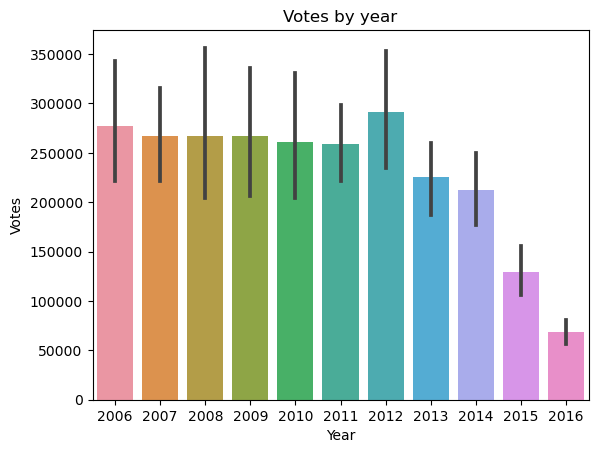

In [25]:
sns.barplot(x='Year',y='Votes',data=data)
plt.title("Votes by year")


In Which Year There Was The Highest Average Revenue?

In [26]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [27]:
data.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending=False)

Year
2009    115.742000
2012    110.103065
2010    105.081579
2008     97.525417
2011     93.703333
2007     93.074091
2013     88.084643
2006     87.255610
2014     85.433656
2015     80.725596
2016     55.566111
Name: Revenue (Millions), dtype: float64

Text(0.5, 1.0, 'Revenue (Millions) by year')

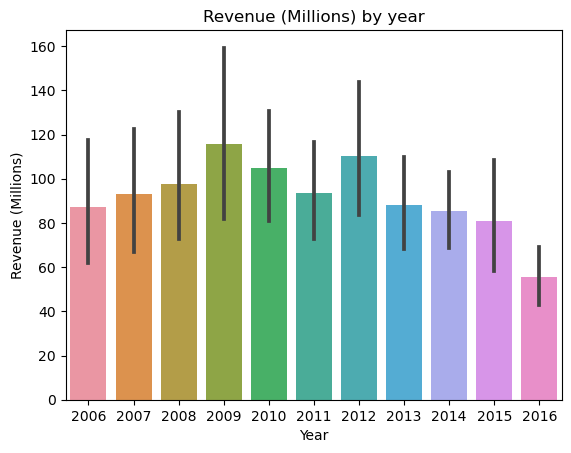

In [28]:
sns.barplot(x='Year',y='Revenue (Millions)',data=data)
plt.title("Revenue (Millions) by year")

 Find The Average Rating For Each Director

In [29]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [31]:
data.groupby('Director')['Rating'].mean().sort_values(ascending=False)

Director
Christopher Nolan                   8.68
Olivier Nakache                     8.60
Makoto Shinkai                      8.60
Florian Henckel von Donnersmarck    8.50
Aamir Khan                          8.50
                                    ... 
Sam Taylor-Johnson                  4.10
Joey Curtis                         4.00
George Nolfi                        3.90
James Wong                          2.70
Jason Friedberg                     1.90
Name: Rating, Length: 524, dtype: float64

Display Top 10 Lengthy Movies Title and Runtime

In [32]:
 data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [36]:
top_10_len  = data.nlargest(10,'Runtime (Minutes)')[['Title','Runtime (Minutes)']].set_index('Title')

In [37]:
top_10_len

,Runtime (Minutes)
Title,
The Hateful Eight,187
The Wolf of Wall Street,180
La vie d'Adèle,180
Cloud Atlas,172
3 Idiots,170
Interstellar,169
Pirates of the Caribbean: At World's End,169
The Hobbit: An Unexpected Journey,169
The Curious Case of Benjamin Button,166


<Axes: xlabel='Runtime (Minutes)', ylabel='Title'>

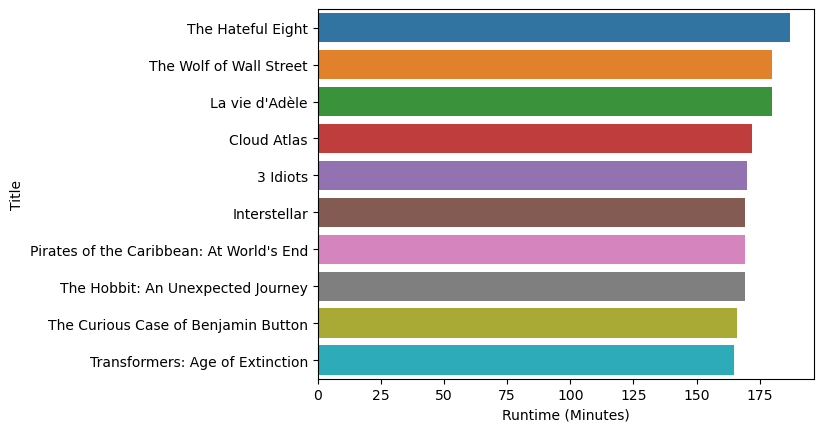

In [39]:
sns.barplot(x='Runtime (Minutes)',y=top_10_len.index,data=top_10_len)

Display Number of Movies Per Year

In [40]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [41]:
data['Year'].value_counts()

2016    198
2015    109
2014     93
2013     84
2012     62
2011     57
2010     57
2008     48
2009     45
2007     44
2006     41
Name: Year, dtype: int64

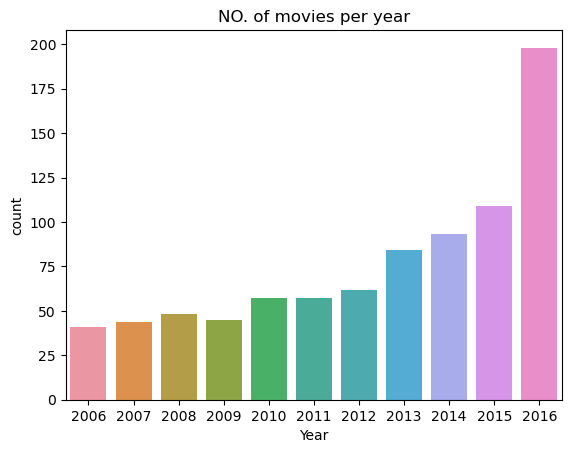

In [43]:
sns.countplot(x='Year',data=data)
plt.title("NO. of movies per year")
plt.show()

Find Most Popular Movie Title (Higest Revenue)

In [44]:
data.columns


Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [49]:
data[data['Revenue (Millions)'].max()==data['Revenue (Millions)']]['Title']

50    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object

Display Top 10 Highest Rated Movie Titles And its Directors

In [50]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [53]:
top10_len  = data.nlargest(10,'Rating')[['Title','Rating','Director']].set_index('Title')

In [54]:
top10_len

,Rating,Director
Title,,
The Dark Knight,9.0,Christopher Nolan
Inception,8.8,Christopher Nolan
Interstellar,8.6,Christopher Nolan
Kimi no na wa,8.6,Makoto Shinkai
The Intouchables,8.6,Olivier Nakache
The Prestige,8.5,Christopher Nolan
The Departed,8.5,Martin Scorsese
The Dark Knight Rises,8.5,Christopher Nolan
Whiplash,8.5,Damien Chazelle


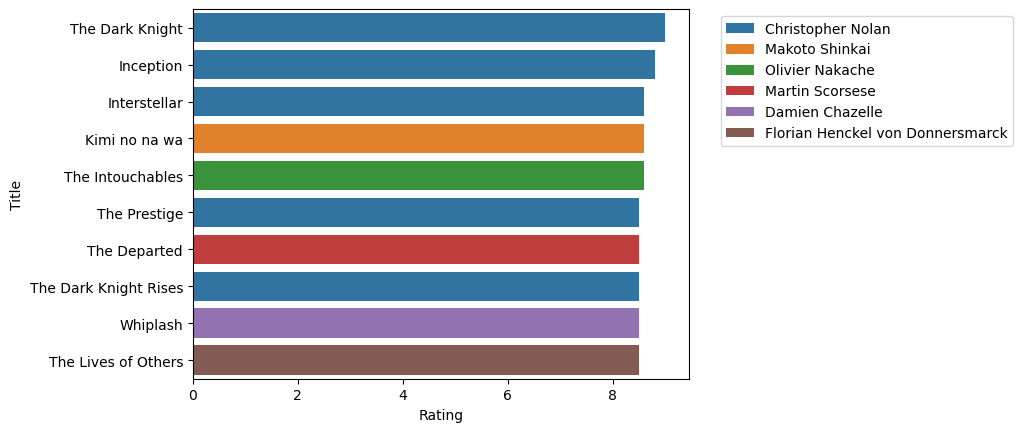

In [60]:
sns.barplot(x='Rating',y=top10_len.index,data=top10_len,hue='Director',dodge=False)
plt.legend(bbox_to_anchor=(1.05,1),loc=2)

Display Top 10 Highest Revenue Movie Titles

In [61]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [67]:
top_10 = data.nlargest(10,'Revenue (Millions)')[['Title','Revenue (Millions)']].set_index('Title')

In [68]:
top_10

,Revenue (Millions)
Title,
Star Wars: Episode VII - The Force Awakens,936.63
Avatar,760.51
Jurassic World,652.18
The Avengers,623.28
The Dark Knight,533.32
Rogue One,532.17
Finding Dory,486.29
Avengers: Age of Ultron,458.99
The Dark Knight Rises,448.13


<Axes: xlabel='Revenue (Millions)', ylabel='Title'>

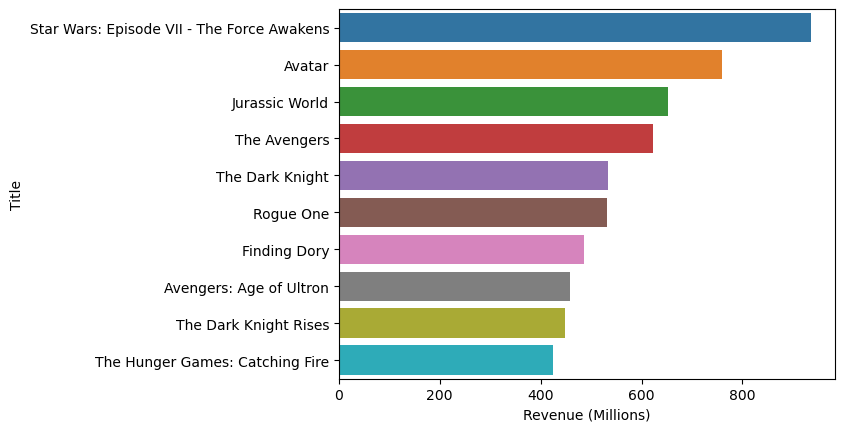

In [69]:
sns.barplot(x='Revenue (Millions)',y=top_10.index,data=top_10,)

Find Average Rating of Movies Year Wise

In [70]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [71]:
data.groupby('Year')['Rating'].mean().sort_values(ascending=False)

Year
2006    7.143902
2007    7.140909
2011    6.945614
2012    6.933871
2009    6.911111
2010    6.894737
2013    6.832143
2014    6.822581
2008    6.708333
2015    6.674312
2016    6.644444
Name: Rating, dtype: float64

In [72]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

Does Rating Affect The Revenue?

<Axes: xlabel='Rating', ylabel='Revenue (Millions)'>

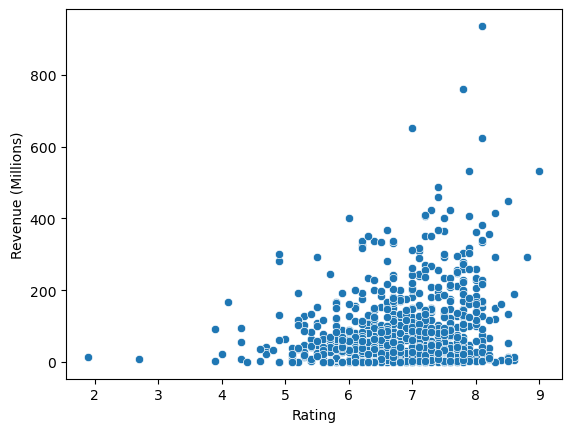

In [73]:
sns.scatterplot(x="Rating",y='Revenue (Millions)',data=data)

Classify Movies Based on Ratings [Excellent,Good and Average]


In [74]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [75]:
def rating(rating):
    if rating>=7.0:
        return "Excellent"
    elif rating>=6.0:
        return "Good"
    else:
        return "Average"
    

In [76]:
data['rating_cat'] = data['Rating'].apply(rating)

C:\Users\virat\AppData\Local\Temp\ipykernel_38072\2285823999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rating_cat'] = data['Rating'].apply(rating)


In [77]:
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,rating_cat
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Excellent
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Excellent
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Excellent
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Excellent
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Good


Count Number of Action Movies

In [78]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'rating_cat'],
      dtype='object')

In [81]:
len(data[data['Genre'].str.contains('Action',case=False)])

277

In [82]:
data['Genre'].unique()

array(['Action,Adventure,Sci-Fi', 'Adventure,Mystery,Sci-Fi',
       'Horror,Thriller', 'Animation,Comedy,Family',
       'Action,Adventure,Fantasy', 'Comedy,Drama,Music',
       'Action,Adventure,Biography', 'Adventure,Drama,Romance',
       'Adventure,Family,Fantasy', 'Biography,Drama,History',
       'Animation,Adventure,Comedy', 'Action,Comedy,Drama',
       'Action,Thriller', 'Biography,Drama', 'Drama,Mystery,Sci-Fi',
       'Adventure,Drama,Thriller', 'Drama', 'Comedy',
       'Action,Adventure,Drama', 'Drama,Thriller',
       'Action,Adventure,Comedy', 'Action,Horror,Sci-Fi',
       'Adventure,Drama,Sci-Fi', 'Action,Adventure,Western',
       'Comedy,Drama', 'Action,Crime,Thriller', 'Action,Crime,Drama',
       'Adventure,Drama,History', 'Crime,Horror,Thriller',
       'Drama,Romance', 'Comedy,Drama,Romance', 'Crime,Drama,Mystery',
       'Drama,Romance,Thriller', 'Drama,History,Thriller',
       'Action,Drama,Thriller', 'Action,Drama,Romance', 'Drama,Fantasy',
       'Action,Sc

Find Unique Values From Genre

In [83]:
list1=[]
for value in data['Genre']:
    list1.append(value.split(','))

In [84]:
list1

[['Action', 'Adventure', 'Sci-Fi'],
 ['Adventure', 'Mystery', 'Sci-Fi'],
 ['Horror', 'Thriller'],
 ['Animation', 'Comedy', 'Family'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Music'],
 ['Action', 'Adventure', 'Biography'],
 ['Adventure', 'Drama', 'Romance'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Comedy', 'Drama'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Thriller'],
 ['Biography', 'Drama'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Adventure', 'Drama', 'Thriller'],
 ['Drama'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Comedy'],
 ['Drama', 'Thriller'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Horror', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi']

In [89]:
one_d=[]
for item in list1:
    for item1 in item:
        one_d.append(item1)

In [90]:
one_d

['Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Mystery',
 'Sci-Fi',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Comedy',
 'Drama',
 'Music',
 'Action',
 'Adventure',
 'Biography',
 'Adventure',
 'Drama',
 'Romance',
 'Adventure',
 'Family',
 'Fantasy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Comedy',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Thriller',
 'Biography',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Thriller',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Comedy',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Horror',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Advent

In [91]:
uni_list=[]
for item in one_d:
    if item not in uni_list:
        uni_list.append(item)

In [94]:
uni_list

['Action',
 'Adventure',
 'Sci-Fi',
 'Mystery',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Fantasy',
 'Drama',
 'Music',
 'Biography',
 'Romance',
 'History',
 'Western',
 'Crime',
 'War',
 'Musical',
 'Sport']

In [95]:
len(one_d)

2190

How Many Films of Each Genre Were Made

In [97]:
from collections import Counter

In [98]:
Counter(one_d)

Counter({'Action': 277,
         'Adventure': 244,
         'Sci-Fi': 107,
         'Mystery': 86,
         'Horror': 87,
         'Thriller': 148,
         'Animation': 45,
         'Comedy': 250,
         'Family': 48,
         'Fantasy': 92,
         'Drama': 419,
         'Music': 15,
         'Biography': 67,
         'Romance': 120,
         'History': 25,
         'Western': 4,
         'Crime': 126,
         'War': 10,
         'Musical': 5,
         'Sport': 15})